## Deep Learning NLP
This coding challenge is about fake news classification. We will train classification model in order to classify news. The outline of this work is as follow:

- Loading the dataset
-  Loading librairies
- Exploring the dataset
- Splitting the dataset
- Processing the dataset
- Using word2vec for features representation
- Applying Naive Bayes algorithm

Author: Mbaimou Auxence NGREMMADJI

## Loading the dataset

We use kaggle API for uploading the dataset.

In [ ]:
## installing kaggle and uploading kaggle.json file. 
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"oxpunch","key":"08d1808f51ec966449b5b8b85b0b4c69"}'}

In [ ]:
# Creating a directory
!mkdir ~/.kaggle
# Copying kaggle.json in that directory 
!cp kaggle.json ~/.kaggle/
# Changing the permission 
! chmod 600 ~/.kaggle/kaggle.json
# Downloading the dataset
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
fake-and-real-news-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Unzipping the dataset
!unzip -q  fake-and-real-news-dataset.zip 

## Loading librairies

In [ ]:
# For lemmatization
from nltk.stem import WordNetLemmatizer
# For tokenization
from nltk import sent_tokenize
# For regular expression
import re
nltk.download('punkt')
nltk.download('wordnet')
# Stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
# dealing with operating system
import os
# natural  language toolkit
import nltk
# word2vec 
from gensim.models import word2vec
# math (array, matrix, etc)
import numpy as np
# for modelling
from sklearn.linear_model import LogisticRegression
# plotting
from matplotlib import pyplot as plt
# DataFrame
import pandas as pd
# For splitting the dataset
from sklearn.model_selection import train_test_split
# for scoring
from sklearn.metrics import  accuracy_score, roc_curve
from sklearn import  metrics
# For data visualization
import seaborn as sn
# For handling string
import string
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Exploring the dataset

In [ ]:
true_news =  pd.read_csv('True.csv')
fake_news =  pd.read_csv('Fake.csv')

In [ ]:
## The shape of the dataset
print('The shape of true_news dataset is {}.'.format(true_news.shape))
print('The shape of fake_news dataset is {}.'.format(fake_news.shape))

The shape of true_news dataset is (21417, 4).
The shape of fake_news dataset is (23481, 4).


In [ ]:
# sample of the true_news
true_news.sample(5)

,title,text,subject,date
7466,Greece's Golden Dawn says Trump win a victory ...,ATHENS (Reuters) - Greece’s far-right Golden D...,politicsNews,"November 9, 2016"
15142,Kosovo says 'false' arrest warrant for PM unde...,PRISTINA (Reuters) - Kosovo accused Serbia of ...,worldnews,"November 10, 2017"
4566,House Speaker Ryan understands Trump's frustra...,WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"March 30, 2017"
18903,Iraqi parliament asks leader Abadi to take bac...,BAGHDAD (Reuters) - The Iraqi parliament on We...,worldnews,"September 27, 2017"
10117,"Biden, Ukraine's Poroshenko to meet Thursday: ...",WASHINGTON (Reuters) - U.S. Vice President Joe...,politicsNews,"March 30, 2016"


In [ ]:
# sample of the fake_news
fake_news.sample(5)

,title,text,subject,date
3148,House Republicans Give Themselves The Power T...,It s only been a couple days since Republicans...,News,"January 5, 2017"
4872,The N-Word Flies As Racists Attack 49er’s Qua...,"Just remember, Donald Trump s campaign is supp...",News,"August 27, 2016"
13967,WATCH 8TH Grader DESTROY Disgraced Detroit Cit...,Watching this video will help anyone who is cu...,politics,"May 6, 2016"
17442,NOT NEWS: [Graphic Video] Michigan Woman Runs ...,This is a story that will never make the news....,Government News,"Apr 9, 2015"
17858,NANCY PELOSI Thanks Dreamers for Coming to U.S...,This is what Democrats think of people who bro...,left-news,"Oct 5, 2017"


In [ ]:
# Missing values in true_news:
true_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
fake_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
# Number of duplicated observations in the true_news.
true_news.duplicated().sum()

206

In [ ]:
# Number of duplicated observations in the fake_news dataset.
fake_news.duplicated().sum()

3

In [ ]:
# We drop duplicated observations in true_news dataset.
true_news.drop_duplicates(inplace= True)
fake_news.drop_duplicates(inplace= True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


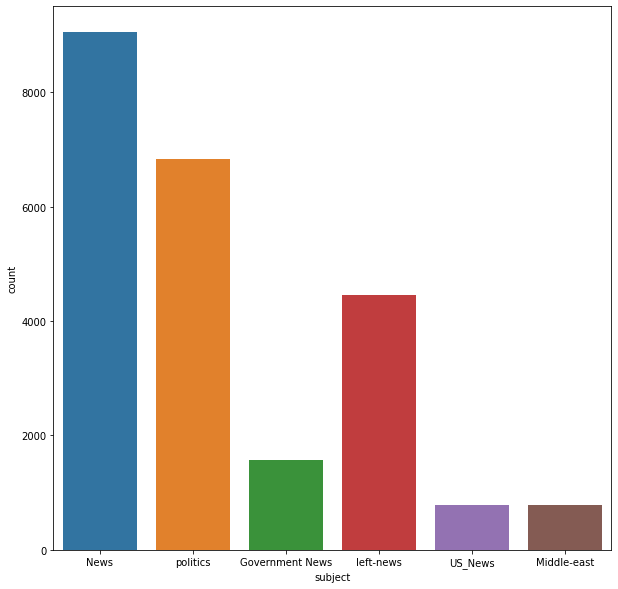

In [ ]:
## Visualization of type of subject in fake_news dataset.
plt.figure(figsize=(10,10))
sn.countplot(fake_news['subject'], x= fake_news)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


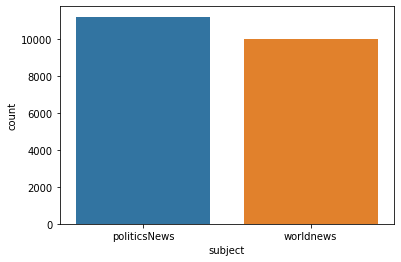

In [ ]:
## Visualization for true_news.
plt.figure()
sn.countplot(true_news['subject'], x= fake_news)
plt.show()

In [ ]:
# Let's create the target variable.
true_news['target'] = 1
fake_news['target'] = 0

In [ ]:
true_news.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
fake_news.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
# We concatenate the two datasets.
data = pd.concat([true_news, fake_news])
# We add title and text.
data['Full_information'] = data['title'] + "  " + data['text']
# Let's remove the columns date, subject, title and text.
data.drop(['date', 'title', 'text', 'subject'], inplace= True, axis= 1)

In [ ]:
data.head()

,target,Full_information
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...


In [ ]:
data.Full_information.values[0]


'As U.S. budget fight looms, Republicans flip their fiscal script  WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for no

In [ ]:
del true_news, fake_news

## Splitting the dataset

In [ ]:
 # splitting the dataset.
 y = data['target']
 X = data.drop('target', axis= 1)
 X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size = 0.3, random_state = 1) 

In [ ]:
# resetting the index
X_train.reset_index(drop= True, inplace= True)
X_test.reset_index(drop= True, inplace= True) 
y_train.reset_index(drop= True, inplace= True) 
y_test.reset_index(drop= True, inplace= True) 

In [ ]:
# The number of words in the training set.
sum(X_train['Full_information'].apply(lambda x:len(x)).values)

79611947

### Processing the training set 

In [ ]:
def cleaning_text():
  """
  This function cleans the text by removing punctuations, lowercasing each word and removing stopwords.
  Lemmatization is used.
  """
  corpus = []
  stem =  nltk.stem.SnowballStemmer('english')
  for text in X_train['Full_information']:
    text = re.sub('[0-9]', ' ', text)
    text = text.lower() 
    clean = re.compile('<.*?>')
    text = re.sub(cleanr, ' ', text) 
    text = re.sub(r'[?|!|\'|"|#]',r'',text)
    text = re.sub(r'[.|,|)|(|\|/]',r' ',text) 
    text = text.strip()
    words = [stem.stem(word) for word in text.split() if word not in stopwords.words('english')]
    corpus.append(words)  
  return corpus

In [ ]:
corpus = cleaning_text()

In [ ]:
corpus[1]

['here',
 'black',
 'voter',
 'think',
 'donald',
 'trump',
 'pathet',
 'attempt',
 'woo',
 'donald',
 'trump',
 'arrog',
 'narcissist',
 'enough',
 'probabl',
 'think',
 'convinc',
 'black',
 'voter',
 'support',
 'wrong',
 'turn',
 'black',
 'voter',
 'overwhelm',
 'unimpress',
 'trump',
 'pathet',
 'outreach',
 'effort',
 'republican',
 'one',
 'blame',
 'year',
 'republican',
 'stereotyp',
 'black',
 'peopl',
 'poor',
 'peopl',
 'live',
 'violent',
 'neighborhood',
 'want',
 'free',
 'stuff',
 'donald',
 'trump',
 'made',
 'view',
 'centerpiec',
 'plea',
 'african-american',
 'live',
 'poverti',
 'school',
 'good',
 'job',
 'percent',
 'youth',
 'unemploy',
 'hell',
 'lose',
 'trump',
 'ask',
 'speech',
 'earlier',
 'week',
 'messag',
 'strengthen',
 'resolv',
 'black',
 'voter',
 'vote',
 'new',
 'york',
 'time',
 'actual',
 'went',
 'talk',
 'black',
 'voter',
 'unlik',
 'trump',
 'speak',
 'white',
 'audienc',
 'tell',
 'black',
 'peopl',
 'live',
 'like',
 'hear',
 'talk',
 'bl

## Word embedding method: word2vec

In [ ]:
from gensim.models import Word2Vec
w2v = Word2Vec(list(corpus), min_count=2)

In [ ]:
## length of the vocabulary
len(w2v.wv.vocab)

67872

In [ ]:
## Similarities
w2v.most_similar('trump')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('president-elect', 0.6623184680938721),
 ('trump:', 0.5722377896308899),
 ('obama', 0.5251468420028687),
 ('republican', 0.5029903054237366),
 ('actual', 0.4953700602054596),
 ('conway', 0.47758036851882935),
 ('bush', 0.4692569673061371),
 ('presid', 0.46103304624557495),
 ('seem', 0.4575158357620239),
 ('@wsj:', 0.4570156931877136)]

In [ ]:
# most similar words to freedom
w2v.most_similar('freedom')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('democraci', 0.6168619394302368),
 ('liberti', 0.6049825549125671),
 ('free', 0.5996103286743164),
 ('principl', 0.5283186435699463),
 ('cherish', 0.49440035223960876),
 ('sovereignti', 0.4870368242263794),
 ('infring', 0.4773002862930298),
 ('toler', 0.47693124413490295),
 ('guarante', 0.47630539536476135),
 ('religi', 0.47127723693847656)]

In [ ]:
# The represention of the word trump. 
w2v['trump']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([-1.2473543 ,  0.520731  , -0.16841027,  0.3475362 ,  1.5167011 ,
       -0.7213642 , -0.9282631 , -1.1962711 , -2.0906653 , -0.8255034 ,
       -3.6345444 ,  0.44253758,  0.6753561 ,  0.03122572,  2.645741  ,
       -1.2173619 ,  0.6058597 ,  0.7006084 , -1.387257  ,  0.5962308 ,
       -3.731654  , -0.45442864,  0.6974678 ,  0.65815616,  0.2689755 ,
       -2.004096  , -1.2475362 ,  1.142255  ,  2.2265763 , -0.2941149 ,
        2.1796517 ,  1.1252983 , -0.36446774,  0.73440176,  2.5042198 ,
        2.907986  ,  0.04877087,  0.47746876,  0.04282359,  0.5618133 ,
        2.8747394 , -0.17894566, -3.1601758 ,  2.1072063 ,  1.2008172 ,
       -0.2113186 ,  0.80543137, -3.1469686 ,  2.1249309 , -2.468279  ,
       -1.4544162 , -0.38518193, -1.5162257 , -0.03810613, -1.3543044 ,
        2.182589  ,  0.36017904, -0.54515064,  0.66803783,  1.2988625 ,
        1.3153152 ,  0.685614  ,  2.4604762 ,  1.0606254 ,  1.1243894 ,
       -1.7831205 , -1.4389821 ,  0.4144089 ,  0.57871765, -2.25

In [ ]:
def vector_representation(docs, size = 100):
    """ This function converts document into number thanks to word2vec.
        Inputs: docs: strings
                size: integer (the size of the vector representation)
    """
    average_vector = []
    count = 0
    vector = np.zeros(size)
    for word in docs:
      try:
          vector += w2v[word]
          count += 1
      except:
           pass
    return vector/count     

In [ ]:
# Create a new column called vectors
X_train['vectors'] = X_train['Full_information'].apply(vector_representation, size = 100)
X_test['vectors'] = X_test['Full_information'].apply(vector_representation, size = 100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package s

In [ ]:
X_train.head()

,Full_information,vectors
0,NY Times Columnist David Brooks: Trump Will B...,"[-0.3029323843914531, 0.21018069344166537, 0.5..."
1,Here’s What Black Voters Think Of Donald Trum...,"[-0.3262597788138833, 0.1941212124414001, 0.53..."
2,One of Liberia's main parties calls for halt t...,"[-0.3028052875853546, 0.23572140681270665, 0.5..."
3,"Trump Caught Illegally Buying $55,000 Worth O...","[-0.2665467654432677, 0.23028377191552632, 0.5..."
4,"Kellyanne Conway, Trump Jr. Spread False Info...","[-0.27302842925619, 0.24269538810881966, 0.534..."


In [ ]:
X_test.head()

,Full_information,vectors
0,"Republicans propose to delay, pause Obamacare ...","[-0.28197844052056165, 0.2412806591842843, 0.5..."
1,Trump Demands To Know Why The Millions Of Wom...,"[-0.29003335606944936, 0.27581185158838073, 0...."
2,Trump Supporter Pleads Guilty To Tampering Wi...,"[-0.23307328505226138, 0.24558593104869503, 0...."
3,WOW! DEM STRATEGIST Bob Beckel Says Wikileaks ...,"[-0.3181923298238513, 0.1665325350570696, 0.52..."
4,U.S. Taxpayers Were On The Hook For Trump’s C...,"[-0.28942221482476355, 0.2521572893684189, 0.4..."


In [ ]:
list(X_train['vectors'].values)

[array([-0.30293238,  0.21018069,  0.50431125, -0.05593368, -0.81286995,
        -0.00741152, -0.34104259, -0.99121525, -0.10807989,  0.51326656,
         0.91234437,  0.60242942,  0.28674183, -1.01486701, -0.03686164,
         0.66220096, -0.72196607, -0.5384714 , -0.69041847,  0.03293646,
         0.16229577, -0.46502863, -0.30706132,  0.68052104, -1.14667985,
         0.28937656,  0.73024103, -0.02430574, -0.27202625,  0.35019274,
        -0.09431517, -0.26142298, -1.03250101, -0.5302579 , -0.13457645,
         0.22353458, -0.28923341, -0.6707995 ,  0.63321943,  1.65184483,
        -0.66822119, -1.8226606 , -0.28915418, -0.78432392,  0.38116286,
        -1.09481193,  0.97528091,  0.29608501, -0.03415184,  1.17729589,
        -0.11867839, -0.06800116,  0.0153285 ,  0.91301565, -1.18230675,
        -0.00964245,  0.18827884,  0.19060886,  0.28788647, -0.70492046,
        -0.9246021 ,  0.03946145, -1.07406443, -0.65780881,  0.21977452,
         0.77214064, -0.36645001,  0.62882942, -1.3

#3 Training model

In [ ]:
# let'us reshape the vectors X defined below.
X = X_train['vectors'].to_numpy()
X = X.reshape(-1, 1)

In [ ]:
# We concatenate X 
X = np.concatenate(np.concatenate(X, axis = 0), axis = 0).reshape(-1, 100)

In [ ]:
# We create a dataframe
X = pd.DataFrame(X)

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-0.302932,0.210181,0.504311,-0.055934,-0.812870,-0.007412,-0.341043,-0.991215,-0.108080,0.513267,0.912344,0.602429,0.286742,-1.014867,-0.036862,0.662201,-0.721966,-0.538471,-0.690418,0.032936,0.162296,-0.465029,-0.307061,0.680521,-1.146680,0.289377,0.730241,-0.024306,-0.272026,0.350193,-0.094315,-0.261423,-1.032501,-0.530258,-0.134576,0.223535,-0.289233,-0.670799,0.633219,1.651845,...,-0.924602,0.039461,-1.074064,-0.657809,0.219775,0.772141,-0.366450,0.628829,-1.300102,-0.461998,-0.495077,-0.258191,-0.653949,-1.366924,-0.543006,0.325148,1.042945,0.144307,0.485228,0.474758,-0.593362,0.742181,0.034427,0.317262,-0.194215,-0.428106,1.349122,0.141027,0.475927,-0.456310,0.952831,0.840036,-0.773382,-0.068867,-0.604853,0.456741,0.211335,-1.498186,-0.870828,-0.155022
1,-0.326260,0.194121,0.530934,-0.071153,-0.762495,0.018536,-0.378872,-0.997865,-0.208735,0.491173,1.001875,0.674193,0.208384,-1.062581,-0.051789,0.693108,-0.827971,-0.489605,-0.598957,0.036326,0.171612,-0.506977,-0.253486,0.731218,-1.201869,0.265842,0.715642,0.069877,-0.268631,0.370282,-0.092067,-0.273003,-0.981011,-0.492083,-0.117068,0.141654,-0.229308,-0.675850,0.676107,1.625540,...,-0.934783,0.062473,-1.136203,-0.696026,0.094362,0.752659,-0.382325,0.584947,-1.304231,-0.462678,-0.405188,-0.210496,-0.605353,-1.428457,-0.642581,0.334228,1.075666,0.154082,0.427042,0.463952,-0.630770,0.791932,-0.059145,0.301708,-0.225463,-0.404158,1.292938,0.046135,0.582651,-0.431311,0.953144,0.838123,-0.808932,0.029736,-0.687090,0.513452,0.222455,-1.558069,-0.762818,-0.188279
2,-0.302805,0.235721,0.531394,-0.052589,-0.790072,0.054448,-0.304049,-0.966468,-0.157994,0.438841,0.876454,0.642081,0.200958,-0.976314,-0.046925,0.699863,-0.751685,-0.578586,-0.734622,0.095371,0.238421,-0.516769,-0.211991,0.661962,-1.166286,0.262425,0.763006,-0.004812,-0.213969,0.254732,-0.100497,-0.235189,-1.004457,-0.518232,-0.107563,0.262341,-0.328969,-0.672684,0.656942,1.585009,...,-0.952415,-0.016785,-1.016672,-0.687497,0.187473,0.716457,-0.310488,0.644375,-1.244657,-0.446382,-0.498331,-0.149395,-0.596687,-1.395887,-0.538239,0.280048,1.017777,0.135647,0.486445,0.480689,-0.683579,0.756985,0.024149,0.277305,-0.146014,-0.439124,1.314728,0.138649,0.619140,-0.462831,0.956881,0.806807,-0.794137,-0.028020,-0.646632,0.461487,0.244333,-1.506673,-0.833007,-0.266296
3,-0.266547,0.230284,0.524299,-0.029760,-0.820645,-0.001061,-0.364502,-0.964620,-0.188807,0.472611,0.950618,0.593998,0.238494,-0.998413,-0.046471,0.665855,-0.731332,-0.512451,-0.692308,0.097148,0.145713,-0.505208,-0.311129,0.719528,-1.186904,0.252731,0.699155,0.006322,-0.295837,0.345926,-0.081023,-0.273153,-0.981133,-0.512642,-0.114875,0.209529,-0.241206,-0.644357,0.617420,1.637079,...,-0.940254,0.032911,-1.051640,-0.671004,0.214007,0.769910,-0.377052,0.620437,-1.291770,-0.481452,-0.440886,-0.180049,-0.592649,-1.377170,-0.553661,0.337260,1.015675,0.145746,0.492375,0.503104,-0.580499,0.756481,0.008337,0.315869,-0.168119,-0.394307,1.298782,0.112784,0.550594,-0.468542,1.001838,0.812742,-0.813067,-0.043451,-0.613199,0.475728,0.225111,-1.511592,-0.806170,-0.163423
4,-0.273028,0.242695,0.534992,-0.050669,-0.860386,-0.013711,-0.336239,-0.970831,-0.139082,0.509249,0.935430,0.574963,0.246819,-1.002633,-0.037607,0.675107,-0.714214,-0.558146,-0.707781,0.073629,0.173085,-0.477843,-0.297663,0.693073,-1.129222,0.258710,0.713581,-0.060448,-0.273174,0.297181,-0.115140,-0.242512,-1.035316,-0.550562,-0.125097,0.225327,-0.312436,-0.696265,0.639805,1.603914,...,-0.949966,0.007530,-1.035752,-0.656924,0.249926,0.769953,-0.373805,0.643118,-1.299840,-0.471540,-0.475923,-0.182001,-0.637994,-1.387308,-0.473142,0.345273,0.978859,0.119935,0.497244,0.508341,-0.627121,0.796332,0.082743,0.341832,-0.163256,-0.425674,1.364324,0.159032,0.572621,-0.465304,0.990221,

In [ ]:
# Is there missing values?
X.isnull().sum()

0     10
1     10
2     10
3     10
4     10
      ..
95    10
96    10
97    10
98    10
99    10
Length: 100, dtype: int64

In [ ]:
X.fillna(X.median(), inplace= True)

In [ ]:
X.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Length: 100, dtype: int64

In [ ]:
X.shape, y_train.shape

((31282, 100), (31282,))

In [ ]:
# training
model = LogisticRegression(max_iter = 300, solver='liblinear')
model.fit(X, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# let'us reshape the vector test.
test = X_test['vectors'].to_numpy()
test = test.reshape(-1, 1)

In [ ]:
# Let us concatenate test 
test = np.concatenate(np.concatenate(test, axis = 0), axis = 0).reshape(-1, 100)

In [ ]:
# Let us create a dataframe
test = pd.DataFrame(test)

In [ ]:
## head
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-0.281978,0.241281,0.524706,-0.068515,-0.797961,0.028914,-0.386665,-1.007856,-0.186638,0.492591,1.005359,0.655622,0.233683,-1.045781,-0.040699,0.707266,-0.789764,-0.532712,-0.680423,0.092581,0.163283,-0.531369,-0.266772,0.719804,-1.240962,0.250695,0.744999,0.035760,-0.279861,0.350820,-0.114402,-0.298334,-1.028891,-0.525283,-0.109949,0.189891,-0.253703,-0.702384,0.680644,1.691540,...,-0.980134,-0.008478,-1.099561,-0.709589,0.174824,0.746607,-0.371289,0.646853,-1.330041,-0.483057,-0.442519,-0.181856,-0.602687,-1.436153,-0.608760,0.360928,1.066005,0.176554,0.495854,0.469069,-0.645265,0.820101,-0.006556,0.334400,-0.219276,-0.429046,1.365295,0.084522,0.625638,-0.438308,1.034686,0.861979,-0.871690,0.000259,-0.677506,0.502124,0.239919,-1.543912,-0.807618,-0.228773
1,-0.290033,0.275812,0.467631,-0.060221,-0.805425,0.011114,-0.390547,-0.988300,-0.123896,0.544175,0.917619,0.577088,0.303834,-1.043533,-0.019714,0.669605,-0.708264,-0.500264,-0.684888,0.065726,0.162988,-0.496685,-0.330316,0.706996,-1.157105,0.244365,0.769018,-0.029738,-0.260361,0.312954,-0.119230,-0.342325,-1.039076,-0.520704,-0.079491,0.214935,-0.251038,-0.670823,0.663475,1.768568,...,-0.987120,0.025709,-1.043753,-0.682246,0.275685,0.747600,-0.318339,0.650570,-1.294651,-0.468097,-0.477218,-0.273633,-0.610989,-1.336203,-0.560546,0.335145,1.058244,0.112568,0.522138,0.479541,-0.571938,0.779191,0.053927,0.377269,-0.260905,-0.430309,1.348912,0.163396,0.498930,-0.452852,1.000572,0.875882,-0.869336,-0.042124,-0.648224,0.446469,0.238007,-1.489052,-0.862928,-0.202670
2,-0.233073,0.245586,0.468758,-0.034680,-0.717961,0.029817,-0.355039,-0.926343,-0.186489,0.456298,0.915171,0.584864,0.252739,-0.976102,-0.017512,0.654434,-0.742986,-0.465623,-0.652283,0.104780,0.140731,-0.487232,-0.256934,0.683236,-1.130100,0.228985,0.675232,0.020636,-0.286079,0.331436,-0.129402,-0.363734,-0.916458,-0.448643,-0.104298,0.195413,-0.167749,-0.647672,0.567925,1.621895,...,-0.922423,0.054077,-0.939599,-0.626755,0.212898,0.673628,-0.322836,0.562949,-1.250054,-0.429721,-0.412899,-0.158151,-0.519375,-1.297103,-0.614968,0.336118,0.968849,0.148328,0.486548,0.470286,-0.535652,0.725640,-0.019528,0.341093,-0.235535,-0.330495,1.229715,0.124253,0.559756,-0.387156,1.036229,0.762350,-0.842274,-0.018355,-0.601584,0.485452,0.211031,-1.402716,-0.729757,-0.175507
3,-0.318192,0.166533,0.529024,-0.032700,-0.830658,0.006584,-0.359497,-0.915494,-0.177736,0.442407,0.896791,0.597439,0.224538,-0.977090,-0.005653,0.663943,-0.733853,-0.564713,-0.679636,0.055158,0.133934,-0.462052,-0.330226,0.696918,-1.218904,0.282984,0.698685,-0.014015,-0.272600,0.351476,-0.054907,-0.175191,-0.952369,-0.503835,-0.132694,0.239431,-0.263673,-0.590946,0.592079,1.582187,...,-0.877713,0.053956,-1.069453,-0.682599,0.159140,0.729202,-0.371105,0.558756,-1.261502,-0.456972,-0.420165,-0.201521,-0.606354,-1.371837,-0.557725,0.246778,1.012498,0.145183,0.462496,0.441000,-0.588991,0.697738,0.007629,0.274712,-0.125279,-0.399635,1.245374,0.108170,0.582967,-0.475245,0.899764,0.796618,-0.778121,-0.072104,-0.664643,0.478127,0.219358,-1.498716,-0.776358,-0.158648
4,-0.289422,0.252157,0.466763,-0.089181,-0.738955,-0.020085,-0.324471,-0.998913,-0.157126,0.521654,0.935622,0.630190,0.221978,-1.013234,-0.044071,0.662064,-0.739587,-0.487200,-0.619686,0.018003,0.164192,-0.520852,-0.268776,0.663364,-1.121151,0.284627,0.738014,0.048623,-0.264325,0.338017,-0.098608,-0.286312,-0.996675,-0.478249,-0.096248,0.162876,-0.223180,-0.656437,0.654721,1.620503,...,-0.915199,0.014224,-1.046213,-0.676170,0.173454,0.725633,-0.367045,0.648171,-1.229600,-0.451351,-0.459809,-0.243189,-0.612267,-1.334691,-0.562710,0.352917,1.035818,0.152549,0.439835,0.441593,-0.596787,0.763190,-0.003145,0.329902,-0.277869,-0.437122,1.348368,0.105477,0.499402,-0.430382,0.948178,0

In [ ]:
## missing values
test.isnull().sum()

0     5
1     5
2     5
3     5
4     5
     ..
95    5
96    5
97    5
98    5
99    5
Length: 100, dtype: int64

In [ ]:
## filling missing values
test.fillna(test.median(), inplace= True)

In [ ]:
prediction = model.predict(test)

In [ ]:
## accuracy
accuracy_score(y_true= y_test, y_pred= prediction)

0.8782725441933319

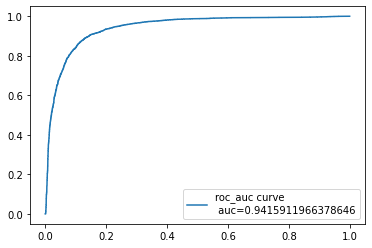

In [ ]:
y_pred_proba = model.predict_proba(test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr,tpr,label="roc_auc curve \n auc="+str(auc))
plt.legend(loc=4)
plt.title('roc_auc curve')
plt.show()

## The top 10 words associated with real news articles and fake news articles

In [ ]:
## Let us define the index of the well-classified text.
index_well_classified = []
for i in range(len(test)):
  if y_test.loc[i] == prediction[i]:
    index_well_classified.append(i)

In [ ]:
dic_frequency = {}
count = 0
for i in index_well_classified:
  for text in X_test['Full_information'].values:
    for word in text:
      if len(word) >1:

        dic_frequency[word] +=1

# Improving the score:

- Increasing the dimensionality of vectors representation when we use word2vec method.